In [210]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [211]:
# Input dataset 

dataset = pd.read_csv('dataset.txt', sep="|", names=['x1', 'x2', 'y'])

In [212]:
dataset

x1        x2  y
0   2.771245  1.784784  0
1   1.728571  1.169761  0
2   3.678320  2.812814  0
3   3.961043  2.619950  0
4   2.999209  2.209014  0
5   7.497546  3.162954  1
6   9.002203  3.339047  1
7   7.444542  0.476683  1
8  10.124939  3.234551  1
9   6.642287  3.319984  1

In [213]:
plt.scatter(dataset['x1'], dataset['x2'], c=dataset['y'])

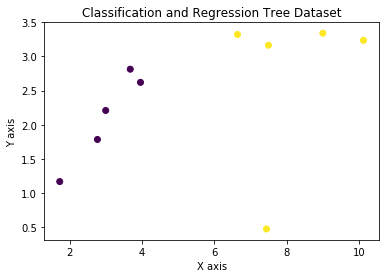

In [214]:
plt.title('Classification and Regression Tree Dataset')
plt.xlabel('X axis');
plt.ylabel('Y axis');
plt.show()

In [215]:
split1 = dataset['x1'][0]

In [216]:
groupList1 = []
def split1method(x1_data, y_data, split):
    for x, y in zip(x1_data, y_data):
        if x < split:
            groupList1.append("LEFT")
        else:
            groupList1.append("RIGHT")
    return groupList1

In [217]:
groupListValSpli1 = split1method(dataset['x1'], dataset['y'], split1)

In [218]:
# Calculate the class count

left_zero = 0
left_one = 0
right_zero = 0
right_one = 0

for y, group in zip(dataset['y'], groupListValSpli1):
    if y == 0 and group == "LEFT":
        left_zero += 1
    elif y == 1 and group == "LEFT":
        left_one += 1
    elif y == 1 and group == "RIGHT":
        right_one += 1
    elif y == 0 and group == "RIGHT":
        right_zero += 1

In [219]:
# Gini Index 
print(left_zero, left_one, right_zero, right_one)
def giniIndex(left_zero, left_one, right_zero, right_one):
    
    y_zero_left = left_zero /( left_zero + left_one)
    y_zero_right = right_zero /( right_zero + right_one)
    y_one_left = left_zero / (left_zero + left_one)
    y_one_right = right_zero / (right_zero + right_one)

    sum_y_zero = y_zero_left * (1 - y_zero_left) + y_zero_right * (1 - y_zero_right)
    sum_y_one = y_one_left * (1 - y_one_left) + y_one_right * (1 - y_one_right)
    
    sumVal = sum_y_zero + sum_y_one
    
    return sumVal
    

1 0 4 5


In [220]:

giniIndexVal = giniIndex(left_zero, left_one, right_zero, right_one)
giniIndexVal

0.49382716049382713

In [221]:
#Split 2 

split2 = dataset['x1'][9]

In [222]:
split2

6.6422873510000002

In [223]:
groupList1 = []
groupListValSplit2 = split1method(dataset['x1'], dataset['y'], split2)
groupListValSplit2

['LEFT',
 'LEFT',
 'LEFT',
 'LEFT',
 'LEFT',
 'RIGHT',
 'RIGHT',
 'RIGHT',
 'RIGHT',
 'RIGHT']

In [224]:
# Calculate the class count

left_zero = 0
left_one = 0
right_zero = 0
right_one = 0

for y, group in zip(dataset['y'], groupListValSplit2):
    if y == 0 and group == "LEFT":
        left_zero += 1
    elif y == 1 and group == "LEFT":
        left_one += 1
    elif y == 1 and group == "RIGHT":
        right_one += 1
    elif y == 0 and group == "RIGHT":
        right_zero += 1
        
print(left_zero, left_one, right_zero, right_one)
giniIndexVal = giniIndex(left_zero, left_one, right_zero, right_one)

5 0 0 5


In [225]:
# Gini Index 
giniIndexVal

0.0

In [241]:
# This splits gives pure gini index it means classes are well seperated

In [242]:
# Making Prediction 

In [243]:
predList = []
def makePrediction(dataset):
    for x in dataset['x1']:
        if x < split2:
            predList.append(0)
        else:
            predList.append(1)
    return predList
        

In [244]:
predList = makePrediction(dataset)
predList

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [239]:
pd.DataFrame(predList, dataset['y'], columns=['pred'])

pred
y      
0     0
0     0
0     0
0     0
0     0
1     1
1     1
1     1
1     1
1     1

In [245]:
# Both the values are same hence Accuracy % is 90 +